# Part 5 - Covariance Matrices and Fisher Ellipses

Winn Koster    |    Haverford Class of 2018    |    winnkoster@gmail.com

In the final notebook of this series, we build a full-fledged Fisher Matrix to test for degeneracies between $D_0$ and other $\Lambda_{CDM}$ parameters. Ultimately, we will find that a minor degeneracy exists among $D_0$ and the various density fractions.

For the most part, I will be walking you through a code I wrote from scratch that computes these matrices, and then a different code that generates the ellipses. I'll be the first to admit that these codes aren't the best. I've written them to be modular, and they allow for any parameters we want, but a fair bit of hard coding is still required; Ideally, a code that lets you just swap out parameters as arguments in a function would be better, but I just didn't get that far.

Finally, the codes are located within the "CMB-products-research" directory. They need to be in a specific location relative to the data input directories. Feel free to change this to your liking. The code is also available from this repository below:

https://github.com/winnk75/CMB-Covariance

At time of writing, I'm not yet sure how I'll publish these notebooks. I may simply add them to the Covariance repository (which is cited in my thesis so I'll never remove it), although there is a lot more content here than just covariance. I may add a new repository; remains to be seen.

### Loading the Data
Below, we begin the way we always have, by importing packages and loading the data. Here, I've done all the data processing in one cell to save time.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
# DEFINE FILE LOCATIONS
print('Loading Data...')

# Nominal Data
fname_nominal_tt = './CMB-products-research/nominal/tt.txt'
fname_axis = './CMB-products-research/nominal/ell.txt'
fname_nominal_ee = './CMB-products-research/nominal/ee.txt'
fname_nominal_te = './CMB-products-research/nominal/te.txt'


# Omega_B
# TT spec
fname_high_long_omega_b_tt = './CMB-products-research/nominal/omega_b-HIGH-LONG/tt.txt'
fname_high_short_omega_b_tt = './CMB-products-research/nominal/omega_b-HIGH-SHORT/tt.txt'
fname_low_long_omega_b_tt = './CMB-products-research/nominal/omega_b-LOW-LONG/tt.txt'
fname_low_short_omega_b_tt = './CMB-products-research/nominal/omega_b-LOW-SHORT/tt.txt'

# EE spec
fname_high_long_omega_b_ee = './CMB-products-research/nominal/omega_b-HIGH-LONG/ee.txt'
fname_high_short_omega_b_ee = './CMB-products-research/nominal/omega_b-HIGH-SHORT/ee.txt'
fname_low_long_omega_b_ee = './CMB-products-research/nominal/omega_b-LOW-LONG/ee.txt'
fname_low_short_omega_b_ee = './CMB-products-research/nominal/omega_b-LOW-SHORT/ee.txt'

# TE spec
fname_high_long_omega_b_te = './CMB-products-research/nominal/omega_b-HIGH-LONG/te.txt'
fname_high_short_omega_b_te = './CMB-products-research/nominal/omega_b-HIGH-SHORT/te.txt'
fname_low_long_omega_b_te = './CMB-products-research/nominal/omega_b-LOW-LONG/te.txt'
fname_low_short_omega_b_te = './CMB-products-research/nominal/omega_b-LOW-SHORT/te.txt'


# Omega_M
# TT spec
fname_high_long_omega_m_tt = './CMB-products-research/nominal/omega_m-HIGH-LONG/tt.txt'
fname_high_short_omega_m_tt = './CMB-products-research/nominal/omega_m-HIGH-SHORT/tt.txt'
fname_low_long_omega_m_tt = './CMB-products-research/nominal/omega_m-LOW-LONG/tt.txt'
fname_low_short_omega_m_tt = './CMB-products-research/nominal/omega_m-LOW-SHORT/tt.txt'

# EE spec
fname_high_long_omega_m_ee = './CMB-products-research/nominal/omega_m-HIGH-LONG/ee.txt'
fname_high_short_omega_m_ee = './CMB-products-research/nominal/omega_m-HIGH-SHORT/ee.txt'
fname_low_long_omega_m_ee = './CMB-products-research/nominal/omega_m-LOW-LONG/ee.txt'
fname_low_short_omega_m_ee = './CMB-products-research/nominal/omega_m-LOW-SHORT/ee.txt'

# TE spec
fname_high_long_omega_m_te = './CMB-products-research/nominal/omega_m-HIGH-LONG/te.txt'
fname_high_short_omega_m_te = './CMB-products-research/nominal/omega_m-HIGH-SHORT/te.txt'
fname_low_long_omega_m_te = './CMB-products-research/nominal/omega_m-LOW-LONG/te.txt'
fname_low_short_omega_m_te = './CMB-products-research/nominal/omega_m-LOW-SHORT/te.txt'


# H_0
# TT spec
fname_high_long_h_0_tt = './CMB-products-research/nominal/h_0-HIGH-LONG/tt.txt'
fname_high_short_h_0_tt = './CMB-products-research/nominal/h_0-HIGH-SHORT/tt.txt'
fname_low_long_h_0_tt = './CMB-products-research/nominal/h_0-LOW-LONG/tt.txt'
fname_low_short_h_0_tt = './CMB-products-research/nominal/h_0-LOW-SHORT/tt.txt'

# EE spec
fname_high_long_h_0_ee = './CMB-products-research/nominal/h_0-HIGH-LONG/ee.txt'
fname_high_short_h_0_ee = './CMB-products-research/nominal/h_0-HIGH-SHORT/ee.txt'
fname_low_long_h_0_ee = './CMB-products-research/nominal/h_0-LOW-LONG/ee.txt'
fname_low_short_h_0_ee = './CMB-products-research/nominal/h_0-LOW-SHORT/ee.txt'

# TE spec
fname_high_long_h_0_te = './CMB-products-research/nominal/h_0-HIGH-LONG/te.txt'
fname_high_short_h_0_te = './CMB-products-research/nominal/h_0-HIGH-SHORT/te.txt'
fname_low_long_h_0_te = './CMB-products-research/nominal/h_0-LOW-LONG/te.txt'
fname_low_short_h_0_te = './CMB-products-research/nominal/h_0-LOW-SHORT/te.txt'


# S = 3200
# TT spec
fname_high_long_s3_5_tt = './CMB-products-research/log_s_3.5/d_0_HIGH-LONG/tt.txt'
fname_high_short_s3_5_tt = './CMB-products-research/log_s_3.5/d_0_HIGH-SHORT/tt.txt'
fname_low_long_s3_5_tt = './CMB-products-research/log_s_3.5/d_0_LOW-LONG/tt.txt'
fname_low_short_s3_5_tt = './CMB-products-research/log_s_3.5/d_0_LOW-SHORT/tt.txt'

# EE spec
fname_high_long_s3_5_ee = './CMB-products-research/log_s_3.5/d_0_HIGH-LONG/ee.txt'
fname_high_short_s3_5_ee = './CMB-products-research/log_s_3.5/d_0_HIGH-SHORT/ee.txt'
fname_low_long_s3_5_ee = './CMB-products-research/log_s_3.5/d_0_LOW-LONG/ee.txt'
fname_low_short_s3_5_ee = './CMB-products-research/log_s_3.5/d_0_LOW-SHORT/ee.txt'

# TE spec
fname_high_long_s3_5_te = './CMB-products-research/log_s_3.5/d_0_HIGH-LONG/te.txt'
fname_high_short_s3_5_te = './CMB-products-research/log_s_3.5/d_0_HIGH-SHORT/te.txt'
fname_low_long_s3_5_te = './CMB-products-research/log_s_3.5/d_0_LOW-LONG/te.txt'
fname_low_short_s3_5_te = './CMB-products-research/log_s_3.5/d_0_LOW-SHORT/te.txt'


# s = 100000 (e+5)
# TT spec
fname_high_long_s5_tt = './CMB-products-research/log_s_5/d_0_HIGH-LONG/tt.txt'
fname_high_short_s5_tt = './CMB-products-research/log_s_5/d_0_HIGH-SHORT/tt.txt'
fname_low_long_s5_tt = './CMB-products-research/log_s_5/d_0_LOW-LONG/tt.txt'
fname_low_short_s5_tt = './CMB-products-research/log_s_5/d_0_LOW-SHORT/tt.txt'

# EE spec
fname_high_long_s5_ee = './CMB-products-research/log_s_5/d_0_HIGH-LONG/ee.txt'
fname_high_short_s5_ee = './CMB-products-research/log_s_5/d_0_HIGH-SHORT/ee.txt'
fname_low_long_s5_ee = './CMB-products-research/log_s_5/d_0_LOW-LONG/ee.txt'
fname_low_short_s5_ee = './CMB-products-research/log_s_5/d_0_LOW-SHORT/ee.txt'

# TE spec
fname_high_long_s5_te = './CMB-products-research/log_s_5/d_0_HIGH-LONG/te.txt'
fname_high_short_s5_te = './CMB-products-research/log_s_5/d_0_HIGH-SHORT/te.txt'
fname_low_long_s5_te = './CMB-products-research/log_s_5/d_0_LOW-LONG/te.txt'
fname_low_short_s5_te = './CMB-products-research/log_s_5/d_0_LOW-SHORT/te.txt'


# logS = 6.5
# TT spec
fname_high_long_s6_5_tt = './CMB-products-research/log_s_6.5/d_0_HIGH-LONG/tt.txt'
fname_high_short_s6_5_tt = './CMB-products-research/log_s_6.5/d_0_HIGH-SHORT/tt.txt'
fname_low_long_s6_5_tt = './CMB-products-research/log_s_6.5/d_0_LOW-LONG/tt.txt'
fname_low_short_s6_5_tt = './CMB-products-research/log_s_6.5/d_0_LOW-SHORT/tt.txt'

# EE spec
fname_high_long_s6_5_ee = './CMB-products-research/log_s_6.5/d_0_HIGH-LONG/ee.txt'
fname_high_short_s6_5_ee = './CMB-products-research/log_s_6.5/d_0_HIGH-SHORT/ee.txt'
fname_low_long_s6_5_ee = './CMB-products-research/log_s_6.5/d_0_LOW-LONG/ee.txt'
fname_low_short_s6_5_ee = './CMB-products-research/log_s_6.5/d_0_LOW-SHORT/ee.txt'

# TE spec
fname_high_long_s6_5_te = './CMB-products-research/log_s_6.5/d_0_HIGH-LONG/te.txt'
fname_high_short_s6_5_te = './CMB-products-research/log_s_6.5/d_0_HIGH-SHORT/te.txt'
fname_low_long_s6_5_te = './CMB-products-research/log_s_6.5/d_0_LOW-LONG/te.txt'
fname_low_short_s6_5_te = './CMB-products-research/log_s_6.5/d_0_LOW-SHORT/te.txt'



# S = 10000000 (e+8)
# TT spec
fname_high_long_s8_tt = './CMB-products-research/log_s_8/d_0_HIGH-LONG/tt.txt'
fname_high_short_s8_tt = './CMB-products-research/log_s_8/d_0_HIGH-SHORT/tt.txt'
fname_low_long_s8_tt = './CMB-products-research/log_s_8/d_0_LOW-LONG/tt.txt'
fname_low_short_s8_tt = './CMB-products-research/log_s_8/d_0_LOW-SHORT/tt.txt'

# EE spec
fname_high_long_s8_ee = './CMB-products-research/log_s_8/d_0_HIGH-LONG/ee.txt'
fname_high_short_s8_ee = './CMB-products-research/log_s_8/d_0_HIGH-SHORT/ee.txt'
fname_low_long_s8_ee = './CMB-products-research/log_s_8/d_0_LOW-LONG/ee.txt'
fname_low_short_s8_ee = './CMB-products-research/log_s_8/d_0_LOW-SHORT/ee.txt'

# TE spec
fname_high_long_s8_te = './CMB-products-research/log_s_8/d_0_HIGH-LONG/te.txt'
fname_high_short_s8_te = './CMB-products-research/log_s_8/d_0_HIGH-SHORT/te.txt'
fname_low_long_s8_te = './CMB-products-research/log_s_8/d_0_LOW-LONG/te.txt'
fname_low_short_s8_te = './CMB-products-research/log_s_8/d_0_LOW-SHORT/te.txt'


# --------------------------------------------------------------------------

# LOAD THE DATA FROM FILES
# Nominal data
data_nominal_tt = np.loadtxt(fname_nominal_tt,skiprows=1)
data_nominal_ee = np.loadtxt(fname_nominal_ee,skiprows=1)
data_nominal_te = np.loadtxt(fname_nominal_te,skiprows=1)
axis = np.loadtxt(fname_axis,skiprows=1)


# OMEGA_B
# TT spec
data_high_long_omega_b_tt = np.loadtxt(fname_high_long_omega_b_tt,skiprows=1)
data_low_long_omega_b_tt = np.loadtxt(fname_low_long_omega_b_tt,skiprows=1)
data_high_short_omega_b_tt = np.loadtxt(fname_high_short_omega_b_tt,skiprows=1)
data_low_short_omega_b_tt = np.loadtxt(fname_low_short_omega_b_tt,skiprows=1)

# EE spec
data_high_long_omega_b_ee = np.loadtxt(fname_high_long_omega_b_ee,skiprows=1)
data_low_long_omega_b_ee = np.loadtxt(fname_low_long_omega_b_ee,skiprows=1)
data_high_short_omega_b_ee = np.loadtxt(fname_high_short_omega_b_ee,skiprows=1)
data_low_short_omega_b_ee = np.loadtxt(fname_low_short_omega_b_ee,skiprows=1)

# TE spec
data_high_long_omega_b_te = np.loadtxt(fname_high_long_omega_b_te,skiprows=1)
data_low_long_omega_b_te = np.loadtxt(fname_low_long_omega_b_te,skiprows=1)
data_high_short_omega_b_te = np.loadtxt(fname_high_short_omega_b_te,skiprows=1)
data_low_short_omega_b_te = np.loadtxt(fname_low_short_omega_b_te,skiprows=1)


# OMEGA_M
# TT spec
data_high_long_omega_m_tt = np.loadtxt(fname_high_long_omega_m_tt,skiprows=1)
data_low_long_omega_m_tt = np.loadtxt(fname_low_long_omega_m_tt,skiprows=1)
data_high_short_omega_m_tt = np.loadtxt(fname_high_short_omega_m_tt,skiprows=1)
data_low_short_omega_m_tt = np.loadtxt(fname_low_short_omega_m_tt,skiprows=1)

# EE spec
data_high_long_omega_m_ee = np.loadtxt(fname_high_long_omega_m_ee,skiprows=1)
data_low_long_omega_m_ee = np.loadtxt(fname_low_long_omega_m_ee,skiprows=1)
data_high_short_omega_m_ee = np.loadtxt(fname_high_short_omega_m_ee,skiprows=1)
data_low_short_omega_m_ee = np.loadtxt(fname_low_short_omega_m_ee,skiprows=1)

# TE spec
data_high_long_omega_m_te = np.loadtxt(fname_high_long_omega_m_te,skiprows=1)
data_low_long_omega_m_te = np.loadtxt(fname_low_long_omega_m_te,skiprows=1)
data_high_short_omega_m_te = np.loadtxt(fname_high_short_omega_m_te,skiprows=1)
data_low_short_omega_m_te = np.loadtxt(fname_low_short_omega_m_te,skiprows=1)


# h_0
# TT spec
data_high_long_h_0_tt = np.loadtxt(fname_high_long_h_0_tt,skiprows=1)
data_low_long_h_0_tt = np.loadtxt(fname_low_long_h_0_tt,skiprows=1)
data_high_short_h_0_tt = np.loadtxt(fname_high_short_h_0_tt,skiprows=1)
data_low_short_h_0_tt = np.loadtxt(fname_low_short_h_0_tt,skiprows=1)

# EE spec
data_high_long_h_0_ee = np.loadtxt(fname_high_long_h_0_ee,skiprows=1)
data_low_long_h_0_ee = np.loadtxt(fname_low_long_h_0_ee,skiprows=1)
data_high_short_h_0_ee = np.loadtxt(fname_high_short_h_0_ee,skiprows=1)
data_low_short_h_0_ee = np.loadtxt(fname_low_short_h_0_ee,skiprows=1)

# TE spec
data_high_long_h_0_te = np.loadtxt(fname_high_long_h_0_te,skiprows=1)
data_low_long_h_0_te = np.loadtxt(fname_low_long_h_0_te,skiprows=1)
data_high_short_h_0_te = np.loadtxt(fname_high_short_h_0_te,skiprows=1)
data_low_short_h_0_te = np.loadtxt(fname_low_short_h_0_te,skiprows=1)


# S = 3200
# TT spec
data_high_long_s3_5_tt = np.loadtxt(fname_high_long_s3_5_tt,skiprows=1)
data_low_long_s3_5_tt = np.loadtxt(fname_low_long_s3_5_tt,skiprows=1)
data_high_short_s3_5_tt = np.loadtxt(fname_high_short_s3_5_tt,skiprows=1)
data_low_short_s3_5_tt = np.loadtxt(fname_low_short_s3_5_tt,skiprows=1)

# EE spec
data_high_long_s3_5_ee = np.loadtxt(fname_high_long_s3_5_ee,skiprows=1)
data_low_long_s3_5_ee = np.loadtxt(fname_low_long_s3_5_ee,skiprows=1)
data_high_short_s3_5_ee = np.loadtxt(fname_high_short_s3_5_ee,skiprows=1)
data_low_short_s3_5_ee = np.loadtxt(fname_low_short_s3_5_ee,skiprows=1)

# TE spec
data_high_long_s3_5_te = np.loadtxt(fname_high_long_s3_5_te,skiprows=1)
data_low_long_s3_5_te = np.loadtxt(fname_low_long_s3_5_te,skiprows=1)
data_high_short_s3_5_te = np.loadtxt(fname_high_short_s3_5_te,skiprows=1)
data_low_short_s3_5_te = np.loadtxt(fname_low_short_s3_5_te,skiprows=1)


# S = 100,000
# TT spec
data_high_long_s5_tt = np.loadtxt(fname_high_long_s5_tt,skiprows=1)
data_low_long_s5_tt = np.loadtxt(fname_low_long_s5_tt,skiprows=1)
data_high_short_s5_tt = np.loadtxt(fname_high_short_s5_tt,skiprows=1)
data_low_short_s5_tt = np.loadtxt(fname_low_short_s5_tt,skiprows=1)

# EE spec
data_high_long_s5_ee = np.loadtxt(fname_high_long_s5_ee,skiprows=1)
data_low_long_s5_ee = np.loadtxt(fname_low_long_s5_ee,skiprows=1)
data_high_short_s5_ee = np.loadtxt(fname_high_short_s5_ee,skiprows=1)
data_low_short_s5_ee = np.loadtxt(fname_low_short_s5_ee,skiprows=1)

# TE spec
data_high_long_s5_te = np.loadtxt(fname_high_long_s5_te,skiprows=1)
data_low_long_s5_te = np.loadtxt(fname_low_long_s5_te,skiprows=1)
data_high_short_s5_te = np.loadtxt(fname_high_short_s5_te,skiprows=1)
data_low_short_s5_te = np.loadtxt(fname_low_short_s5_te,skiprows=1)



# logS = 6.5
# TT spec
data_high_long_s6_5_tt = np.loadtxt(fname_high_long_s6_5_tt,skiprows=1)
data_low_long_s6_5_tt = np.loadtxt(fname_low_long_s6_5_tt,skiprows=1)
data_high_short_s6_5_tt = np.loadtxt(fname_high_short_s6_5_tt,skiprows=1)
data_low_short_s6_5_tt = np.loadtxt(fname_low_short_s6_5_tt,skiprows=1)

# EE spec
data_high_long_s6_5_ee = np.loadtxt(fname_high_long_s6_5_ee,skiprows=1)
data_low_long_s6_5_ee = np.loadtxt(fname_low_long_s6_5_ee,skiprows=1)
data_high_short_s6_5_ee = np.loadtxt(fname_high_short_s6_5_ee,skiprows=1)
data_low_short_s6_5_ee = np.loadtxt(fname_low_short_s6_5_ee,skiprows=1)

# TE spec
data_high_long_s6_5_te = np.loadtxt(fname_high_long_s6_5_te,skiprows=1)
data_low_long_s6_5_te = np.loadtxt(fname_low_long_s6_5_te,skiprows=1)
data_high_short_s6_5_te = np.loadtxt(fname_high_short_s6_5_te,skiprows=1)
data_low_short_s6_5_te = np.loadtxt(fname_low_short_s6_5_te,skiprows=1)


# S = 100000000 (e+8)
# TT spec
data_high_long_s8_tt = np.loadtxt(fname_high_long_s8_tt,skiprows=1)
data_low_long_s8_tt = np.loadtxt(fname_low_long_s8_tt,skiprows=1)
data_high_short_s8_tt = np.loadtxt(fname_high_short_s8_tt,skiprows=1)
data_low_short_s8_tt = np.loadtxt(fname_low_short_s8_tt,skiprows=1)

# EE spec
data_high_long_s8_ee = np.loadtxt(fname_high_long_s8_ee,skiprows=1)
data_low_long_s8_ee = np.loadtxt(fname_low_long_s8_ee,skiprows=1)
data_high_short_s8_ee = np.loadtxt(fname_high_short_s8_ee,skiprows=1)
data_low_short_s8_ee = np.loadtxt(fname_low_short_s8_ee,skiprows=1)

# TE spec
data_high_long_s8_te = np.loadtxt(fname_high_long_s8_te,skiprows=1)
data_low_long_s8_te = np.loadtxt(fname_low_long_s8_te,skiprows=1)
data_high_short_s8_te = np.loadtxt(fname_high_short_s8_te,skiprows=1)
data_low_short_s8_te = np.loadtxt(fname_low_short_s8_te,skiprows=1)


print('All data loaded!')

# --------------------------------------------------------------------------
# All these data files have l_max = 2508. One could add lines to trim the lengths of the data just to make sure, but not needed here
# eg:   data_high_long_s5 = data_high_long_s5[0:2507]

Loading Data...
All data loaded!


### Building empty derivative lists
Below, we build some empty lists, which will be populated with derivatives. The names are long and not so fun to read, but unambiguous.

In [4]:
# TT derivatives
linear_derivatives_long_s5_tt = []
linear_derivatives_short_s5_tt = []

linear_derivatives_long_s3_5_tt = []
linear_derivatives_short_s3_5_tt = []

linear_derivatives_long_s6_5_tt = []
linear_derivatives_short_s6_5_tt = []

linear_derivatives_long_s8_tt = []
linear_derivatives_short_s8_tt = []

linear_derivatives_long_omega_b_tt = []
linear_derivatives_short_omega_b_tt = []

linear_derivatives_long_omega_m_tt = []
linear_derivatives_short_omega_m_tt = []

linear_derivatives_long_h_0_tt = []
linear_derivatives_short_h_0_tt = []



# TE derivatives
linear_derivatives_long_s5_te = []
linear_derivatives_short_s5_te = []


linear_derivatives_long_s3_5_te = []
linear_derivatives_short_s3_5_te = []

linear_derivatives_long_s6_5_te = []
linear_derivatives_short_s6_5_te = []

linear_derivatives_long_s8_te = []
linear_derivatives_short_s8_te = []

linear_derivatives_long_omega_b_te = []
linear_derivatives_short_omega_b_te = []

linear_derivatives_long_omega_m_te = []
linear_derivatives_short_omega_m_te = []

linear_derivatives_long_h_0_te = []
linear_derivatives_short_h_0_te = []

# EE derivatives
linear_derivatives_long_s5_ee = []
linear_derivatives_short_s5_ee = []

linear_derivatives_long_s3_5_ee = []
linear_derivatives_short_s3_5_ee = []

linear_derivatives_long_s6_5_ee = []
linear_derivatives_short_s6_5_ee = []

linear_derivatives_long_s8_ee = []
linear_derivatives_short_s8_ee = []

linear_derivatives_long_omega_b_ee = []
linear_derivatives_short_omega_b_ee = []

linear_derivatives_long_omega_m_ee = []
linear_derivatives_short_omega_m_ee = []

linear_derivatives_long_h_0_ee = []
linear_derivatives_short_h_0_ee = []

print('Built empty derivative lists to be appended to.')

Built empty derivative lists to be appended to.


### Populate derivative lists
The loop below uses the length of the axis to loop through calculating and appending derivatives to the empty lists we just defined.

In [5]:
print('Calculating numerical derivatives for d D_l / d D_0...')

i = 0
while i < len(axis):
    linear_derivatives_long_s5_tt.append( (data_high_long_s5_tt[i] - data_low_long_s5_tt[i]) / 2.0e-6 )
    linear_derivatives_short_s5_tt.append( (data_high_short_s5_tt[i] - data_low_short_s5_tt[i]) / 2.0e-7 )
    linear_derivatives_long_s3_5_tt.append( (data_high_long_s3_5_tt[i] - data_low_long_s3_5_tt[i]) / 2.0e-6 )
    linear_derivatives_short_s3_5_tt.append( (data_high_short_s3_5_tt[i] - data_low_short_s3_5_tt[i]) / 2.0e-7 )
    linear_derivatives_long_s8_tt.append( (data_high_long_s8_tt[i] - data_low_long_s8_tt[i]) / 2.0e-6 )
    linear_derivatives_short_s8_tt.append( (data_high_short_s8_tt[i] - data_low_short_s8_tt[i]) / 2.0e-7 )
    linear_derivatives_long_s6_5_tt.append( (data_high_long_s6_5_tt[i] - data_low_long_s6_5_tt[i]) / 2.0e-6 )
    linear_derivatives_short_s6_5_tt.append( (data_high_short_s6_5_tt[i] - data_low_short_s6_5_tt[i]) / 2.0e-7 )
    linear_derivatives_long_omega_b_tt.append( (data_high_long_omega_b_tt[i] - data_low_long_omega_b_tt[i]) / 2.0e-2 )
    linear_derivatives_short_omega_b_tt.append( (data_high_short_omega_b_tt[i] - data_low_short_omega_b_tt[i]) / 2.0e-3 )
    linear_derivatives_long_omega_m_tt.append( (data_high_long_omega_m_tt[i] - data_low_long_omega_m_tt[i]) / 2.0e-2 )
    linear_derivatives_short_omega_m_tt.append( (data_high_short_omega_m_tt[i] - data_low_short_omega_m_tt[i]) / 2.0e-3 )
    linear_derivatives_long_h_0_tt.append( (data_high_long_h_0_tt[i] - data_low_long_h_0_tt[i]) / 2.0e-2 )
    linear_derivatives_short_h_0_tt.append( (data_high_short_h_0_tt[i] - data_low_short_h_0_tt[i]) / 2.0e-3 )


    linear_derivatives_long_s5_ee.append( (data_high_long_s5_ee[i] - data_low_long_s5_ee[i]) / 2.0e-6 )
    linear_derivatives_short_s5_ee.append( (data_high_short_s5_ee[i] - data_low_short_s5_ee[i]) / 2.0e-7 )
    linear_derivatives_long_s3_5_ee.append( (data_high_long_s3_5_ee[i] - data_low_long_s3_5_ee[i]) / 2.0e-6 )
    linear_derivatives_short_s3_5_ee.append( (data_high_short_s3_5_ee[i] - data_low_short_s3_5_ee[i]) / 2.0e-7 )
    linear_derivatives_long_s8_ee.append( (data_high_long_s8_ee[i] - data_low_long_s8_ee[i]) / 2.0e-6 )
    linear_derivatives_short_s8_ee.append( (data_high_short_s8_ee[i] - data_low_short_s8_ee[i]) / 2.0e-7 )
    linear_derivatives_long_s6_5_ee.append( (data_high_long_s6_5_ee[i] - data_low_long_s6_5_ee[i]) / 2.0e-6 )
    linear_derivatives_short_s6_5_ee.append( (data_high_short_s6_5_ee[i] - data_low_short_s6_5_ee[i]) / 2.0e-7 )
    linear_derivatives_long_omega_b_ee.append( (data_high_long_omega_b_ee[i] - data_low_long_omega_b_ee[i]) / 2.0e-2 )
    linear_derivatives_short_omega_b_ee.append( (data_high_short_omega_b_ee[i] - data_low_short_omega_b_ee[i]) / 2.0e-3 )
    linear_derivatives_long_omega_m_ee.append( (data_high_long_omega_m_ee[i] - data_low_long_omega_m_ee[i]) / 2.0e-2 )
    linear_derivatives_short_omega_m_ee.append( (data_high_short_omega_m_ee[i] - data_low_short_omega_m_ee[i]) / 2.0e-3 )
    linear_derivatives_long_h_0_ee.append( (data_high_long_h_0_ee[i] - data_low_long_h_0_ee[i]) / 2.0e-2 )
    linear_derivatives_short_h_0_ee.append( (data_high_short_h_0_ee[i] - data_low_short_h_0_ee[i]) / 2.0e-3 )

    linear_derivatives_long_s5_te.append( (data_high_long_s5_te[i] - data_low_long_s5_te[i]) / 2.0e-6 )
    linear_derivatives_short_s5_te.append( (data_high_short_s5_te[i] - data_low_short_s5_te[i]) / 2.0e-7 )
    linear_derivatives_long_s3_5_te.append( (data_high_long_s3_5_te[i] - data_low_long_s3_5_te[i]) / 2.0e-6 )
    linear_derivatives_short_s3_5_te.append( (data_high_short_s3_5_te[i] - data_low_short_s3_5_te[i]) / 2.0e-7 )
    linear_derivatives_long_s8_te.append( (data_high_long_s8_te[i] - data_low_long_s8_te[i]) / 2.0e-6 )
    linear_derivatives_short_s8_te.append( (data_high_short_s8_te[i] - data_low_short_s8_te[i]) / 2.0e-7 )
    linear_derivatives_long_s6_5_te.append( (data_high_long_s6_5_te[i] - data_low_long_s6_5_te[i]) / 2.0e-6 )
    linear_derivatives_short_s6_5_te.append( (data_high_short_s6_5_te[i] - data_low_short_s6_5_te[i]) / 2.0e-7 )
    linear_derivatives_long_omega_b_te.append( (data_high_long_omega_b_te[i] - data_low_long_omega_b_te[i]) / 2.0e-2 )
    linear_derivatives_short_omega_b_te.append( (data_high_short_omega_b_te[i] - data_low_short_omega_b_te[i]) / 2.0e-3 )
    linear_derivatives_long_omega_m_te.append( (data_high_long_omega_m_te[i] - data_low_long_omega_m_te[i]) / 2.0e-2 )
    linear_derivatives_short_omega_m_te.append( (data_high_short_omega_m_te[i] - data_low_short_omega_m_te[i]) / 2.0e-3 )
    linear_derivatives_long_h_0_te.append( (data_high_long_h_0_te[i] - data_low_long_h_0_te[i]) / 2.0e-2 )
    linear_derivatives_short_h_0_te.append( (data_high_short_h_0_te[i] - data_low_short_h_0_te[i]) / 2.0e-3 )

    i += 1

print('Calculations complete!')

Calculating numerical derivatives for d D_l / d D_0...
Calculations complete!


### Uncertainty in CMB Power Spectra
We will now model the uncertainty in the CMB power spectra due to cosmic variance and instrument noise. To begin with, we will need to define several constants (which correspond to noise values for various instruments). This way it is easy to swap out instruments (eg: forecasting for Planck, WMAP, or even the cosmic variance limit). This calculation is what makes Fisher Analysis worth the trouble. Note that we have also defined values for the yet-to-be-assembled CMB-S4: using the proposed specifications, we can determine how it might improve our constraints on $D_0$ or any other parameter of interest.

Then in the following cell we define several functions that effectively give us plug and play functionality for the uncertainties.

In [6]:
# List inputs for instrument noise. Format is [ 'name', noise, fwhm, f_sky ]. This preserves some data in global variables for verbose feedback outside of the covariance matrix function calls (this way no hard coding of print statements is required)
# Name: the name of the instrument and any relevant detail
# Noise: the noise in uK arcmin for the instrument
# FWHM: the gaussian beam of the instrument in arcmin
# F_sky: the fraction of the sky observed by the instrument. Even Planck and WMAP don't see the full sky due to the galactic plane.

default = [ 'DEFAULT values', 54., 5., 1. ]         # default values are Planck 217, but I want them defined seperately. Doesn't hurt anything.
planck_143a = ['Planck 143 GHz A', 37., 7.1, 0.65 ]     # Dan listed two different values (called A and B in this code) for different bolometers in Planck. Unless you've been told otherwise, use the B values, which are a more conservative estimate (more noise)
planck_143b = ['Planck 143 GHz B', 78., 7.1, 0.65 ]
planck_217a = ['Planck 217 GHz A', 54., 5., 0.65 ]        # two noise values are given for planck. I've called the lower one A and the upper one B. Not sure what to make of it right now, so just defining them both
planck_217b = ['Planck 217 GHz B', 119., 5., 0.65 ]
wmap_v = ['WMAP V Band', 434., 21., 0.65]
wmap_w = ['WMAP W Band', 409., 13., 0.65]
act_pol = ['Atacama Cosmology Telescope', 8.9, 1.4, 0.097]
spt_3g = ['South Pole Telescope', 2.5, 1.1, 0.06]
cmb_s4 = ['CMB Stage 4', 1.0, 3.0, 0.50]
cvl_test = ['Cosmic Variance LIMIT (test for convergence)', 0., 0., 1.]


In [7]:
# This function simply generates the cosmic variance for a power spectrum
def cosmic_variance(axis,data):
    return data*np.sqrt( 2. / (2.*axis + 1.) )

# This function emulates arXiv 1505.00639, eqn. 47. It generates an approxomation of instrument noise for a given instrument
def instrument_noise(axis,data,input_source=default):
    # Default values are for Planck at 217 GHz; FWHM = 5.0 [arcmin]     NOISE = 54.0 [uK arcmin]

    # Conversion from uK arcmin into uK radian (for noise)
    # This gets squared below
    noise = input_source[1]
    noise = noise*(np.pi/180.)*(1./60.)    # coordinate conversion. 

    # Conversion from arcmin into radian (for beam fwhm)
    fwhm = input_source[2]
    fwhm = fwhm*(np.pi/180.)*(1./60.)   # paper gives arcmin, but radians are the SI unit, and I don't belive in doing any kind of math not in SI units. It's the easiest way to mess something up. Don't believe me? ask the not one but two landers we've crashed into mars because of stuff like this

    # need to convert from C_L to D_L so multiple the whole enchelada by (L(L+1)) / 2pi...
    return ((axis*(axis+1.))/(2.*np.pi))*(noise**2.)*np.exp( (axis*(axis+1.)*(fwhm**2.))/(5.545177) )

    # As a reminder, this all follows from 1505.00639 (see table 3 and eqn 47)

# This function combines the cosmic_variance() and instrument_noise() functions, adding their squares and taking a sqare root. Error contributions are uncorrelated, so nothing fancy
def combined_noise(axis,data,input_source=default):
    return np.sqrt( instrument_noise(axis,data,input_source)**2. + cosmic_variance(axis,data)**2. )


### Covariance Matrix
Before we even think about the Fisher Information Matrix, we first need to consider the covariance matrix. This is required because the measurements taken by *Planck* are correlated, *as are the CMB power spectra* even observed by a perfect instrument. We need to account for the fact that the TT, TE, and EE spectra are correlated first (cell below), then we will add the instrument/cosmic variance uncertainties into the covariance matrix (next cell).

If you haven't yet read 0911.3105 yet (specifically the section on CMB stuff), now would be a good time.

In [8]:
# This function is intended to emulate arXiv 0911.3105, eqn. 27 (on page 21)
# 3/26/18: we are removing the BB components entirely. I thought leaving them as zero would be fine, but it makes the matrix non-invertable down the road.
# ...Since we're not actually using them, it's easier to dump them entirely. They'll be commented out.
# ...I have, however, left the default bb_spec option in the function arguments. It's nice if we ever want to uncomment bb modes, and isn't hurting anyone [see below, it actually was hurting things]
# 4/21/18: apparently, the functions don't take a bb_spec argument anymore. I can't remember taking that out, but I must havve when I got it working as a 3x3 matrix instead of a 4x4...

def covariance_matrix(axis, tt_spec, te_spec, ee_spec):
    # Function requires an ell axis, as well as a tt, te, ee spectra with the same length as the axis. bb spec is optional, and will set to zero if not given
    C_L = np.zeros( (len(axis),3,3), dtype=float )          # creates a 3d array for the covariance of dimensions 3x3x(number of ell's). For any given C_L, we need a rank 2 tensor
                                                            # Formerly was a 4x4xN array (to include BB spec), but the 4x4 tensor has zeros in the BB which makes matrix inversion impossible

    # With our array generated in the desired shape, we now use a loop to populate each matrix
    # This is a perfectly diagonal matrix, so we could probably skip some of the steps below for optimization. For the first pass, however, I'd like to make everything explicit. We can worry about optimization later
    i = 0
    while i < len(axis):
        f = 2. / (2.*axis[i] + 1.)                     # Define the pre factor for each C_L
        C_L[i][0][0] = f*tt_spec[i]**2.
        C_L[i][0][1] = f*te_spec[i]**2.
        C_L[i][0][2] = f*tt_spec[i]*te_spec[i]
        #C_L[i][0][3] = 0
        C_L[i][1][0] = f*te_spec[i]**2.
        C_L[i][1][1] = f*ee_spec[i]**2.
        C_L[i][1][2] = f*ee_spec[i]*te_spec[i]
        #C_L[i][1][3] = 0.
        C_L[i][2][0] = f*tt_spec[i]*te_spec[i]
        C_L[i][2][1] = f*ee_spec[i]*te_spec[i]
        C_L[i][2][2] = f*0.5*( (te_spec[i]**2.) + (tt_spec[i]*ee_spec[i]) )
        #C_L[i][2][3] = 0.
        #C_L[i][3][0] = 0.
        #C_L[i][3][1] = 0.
        #C_L[i][3][2] = 0.
        #C_L[i][3][3] = f*bb_spec[i]**2.

        i += 1

    return C_L


### Covariance Matrix with error
As we previously mentioned in the previous cell, the code above is *only* for correlation of the power spectra. Determining covariance for the error, however, is fairly straightforward: we just add the respective error onto each matrix entry. If any of this theory is unclear, check out the paper (eqns. 25-29).

In [9]:
# This function will insert the instrument error sources into the matrix and return uncertainty accordingly. covariance_matrix() returns matrix with ONLY cosmic variance, while covariance_mateix_err() returns matrix with cosmic variance AND instrument noise

def covariance_matrix_err(axis, tt_spec, te_spec, ee_spec, input_source=default):
    # Function requires an ell axis, as well as a tt, te, ee spectra with the same length as the axis. bb spec is optional, and will set to zero if not given
    C_L = np.zeros( (len(axis),3,3), dtype=float )          # creates a 3d array for the covariance of dimensions 4x4x(number of ell's). For any given C_L, we need a rank 2 tensor

    f_sky = input_source[3]  # we only need to defined f_sky within THIS function. noise and fwhm are passed on to the combined_noise (which in turn passes on), but aren't touched here

    print(' ')
    print('Running covariance_matrix_err() function...')
    print('------------INPUTS------------')
    print('Instrument Used: '+str(input_source[0]))
    print('Noise Input [uK arcmin]: '+str(input_source[1]))
    print('Instrument FWHM [arcmin]: '+str(input_source[2]))
    print('Sky Fraction (f_sky): '+str(input_source[3]))
    #print('DEFAULT values are for Planck at 217 GHz;     FWHM = 5.0 [arcmin] and NOISE = 54.0 [uK arcmin]')

    tt_error = combined_noise(axis,tt_spec,input_source)
    te_error = np.zeros( len(axis), dtype='float' )        # no instrument (new) noise for te spectrum, cosmic var is already in C_L matrix
    ee_error = combined_noise(axis,ee_spec,input_source)

    # With our array generated in the desired shape, we now use a loop to populate each matrix
    # This is a perfectly diagonal matrix, so we could probably skip some of the steps below. For the first pass, however, I'd like to make everything explicit. We can worry about optimization later
    i = 0
    while i < len(axis):
        f = 2. / (2.*axis[i] + 1.)                     # Define the pre factor for each C_L
        C_L[i][0][0] = f*(tt_spec[i]+tt_error[i])**2.
        C_L[i][0][1] = f*(te_spec[i]+te_error[i])**2.
        C_L[i][0][2] = f*(tt_spec[i]+tt_error[i])*(te_spec[i]+te_error[i])
        #C_L[i][0][3] = 0.      # bb info, left commented for completeness, but will never be used
        C_L[i][1][0] = f*(te_spec[i]+te_error[i])**2.
        C_L[i][1][1] = f*(ee_spec[i]+ee_error[i])**2.
        C_L[i][1][2] = f*(ee_spec[i]+ee_error[i])*(te_spec[i]+te_error[i])
        #C_L[i][1][3] = 0.      # bb info, left commented for completeness, but will never be used
        C_L[i][2][0] = f*(tt_spec[i]+tt_error[i])*(te_spec[i]+te_error[i])
        C_L[i][2][1] = f*(ee_spec[i]+ee_error[i])*(te_spec[i]+te_error[i])
        C_L[i][2][2] = f*0.5*( ((te_spec[i]+te_error[i])**2.) + ((tt_spec[i]+tt_error[i])*(ee_spec[i]+ee_error[i])) )
        #C_L[i][2][3] = 0.      # bb info, left commented for completeness, but will never be used
        #C_L[i][3][0] = 0.      # bb info, left commented for completeness, but will never be used
        #C_L[i][3][1] = 0.      # bb info, left commented for completeness, but will never be used
        #C_L[i][3][2] = 0.      # bb info, left commented for completeness, but will never be used
        #C_L[i][3][3] = f*bb_spec[i]**2.        # bb info, left commented for completeness, but will never be used

        i += 1

    C_L = C_L*(1./f_sky)    # adds the correction factor for an f_sky less than one. Note that for f_sky =1, nothing happens. from 0911.3105 eq. 29

    return C_L


### Fisher Information Functions
There are two functions in the code that I haven't included here since they're more intermediate coding steps. Once I wrote one, I used it to write the second one, and then ultimately landed on the third iteration, which is included below. The function below, "fisher_information_total" returns a list where the zeroth entry is the Fisher Information, $F_{ij}$, for two parameters $i, j$ in a Fisher Matrix. The way the function is written, it takes derivatives for $i, j$ independently, so you can use it with any cosmological parameters you haver derivatives for.

In [10]:
# Defining the fisher information function. Could use this function multiuple times to populate a fisher matrix. This  function is intended to emulate arXiv 0911.3105, eqn. 26 (on page 20)
# This function takes an axis, power spectra, and derivatives for parameters i and j. For i=j, this simplifies in theory (not programmed). Also takes a covariance matrix.

def fisher_information_total(axis, tt_spec, te_spec, ee_spec, tt_derivatives_i, te_derivatives_i, ee_derivatives_i, tt_derivatives_j, te_derivatives_j, ee_derivatives_j, input_source=default ):
    # We're forming a 4x4xL matrix again, but I'm avoiding using super pythonic loops for the same reason as before: accuracy is more important than optimization.
    # ... there are only sixteen entries, so I'm writing each one explicitly. To be honest the 3d array scares me, and the indexing can be a challenge.

    #print('Noise Input [uK arcmin]: '+str(noise))
    #print('Instrument FWHM [arcmin]'+str(fwhm))

    C_L = covariance_matrix_err(axis, tt_spec, te_spec, ee_spec, input_source)       # references previous function
    C_L_inv = np.zeros( (len(axis),3,3), dtype=float )                           # just an empty array

    # Need to take the inverses of C_L matrices at all L values. Best way to do this is loop
    i=0
    while i < len(axis):
        C_L_inv[i] = np.linalg.inv(C_L[i])
        i+=1

    # This takes the format entry_X_Y to link up with eqn. 26. The X derivatives go with param_i, and the Y derivatives go with param_j
    entry_tt_tt = 0.
    entry_tt_te = 0.
    entry_tt_ee = 0.
    entry_tt_bb = 0.
    entry_te_tt = 0.
    entry_te_te = 0.
    entry_te_ee = 0.
    entry_te_bb = 0.
    entry_ee_tt = 0.
    entry_ee_te = 0.
    entry_ee_ee = 0.
    entry_ee_bb = 0.
    entry_bb_tt = 0.
    entry_bb_te = 0.
    entry_bb_ee = 0.
    entry_bb_bb = 0.

    i=0
    while i < len(axis):
        entry_tt_tt += tt_derivatives_i[i]*tt_derivatives_j[i]*(C_L_inv[i][0][0])
        entry_tt_te += tt_derivatives_i[i]*te_derivatives_j[i]*(C_L_inv[i][0][1])
        entry_tt_ee += tt_derivatives_i[i]*ee_derivatives_j[i]*(C_L_inv[i][0][2])
        #entry_tt_bb += tt_derivatives_i[i]*bb_derivatives_j[i]*(C_L_inv[i][0][3])      # possible div by zero issues
        entry_te_tt += te_derivatives_i[i]*tt_derivatives_j[i]*(C_L_inv[i][1][0])
        entry_te_te += te_derivatives_i[i]*te_derivatives_j[i]*(C_L_inv[i][1][1])
        entry_te_ee += te_derivatives_i[i]*ee_derivatives_j[i]*(C_L_inv[i][1][2])
        #entry_te_bb += te_derivatives_i[i]*bb_derivatives_j[i]*(C_L_inv[i][1][3])      # possible div by zero issues
        entry_ee_tt += ee_derivatives_i[i]*tt_derivatives_j[i]*(C_L_inv[i][2][0])
        entry_ee_te += ee_derivatives_i[i]*te_derivatives_j[i]*(C_L_inv[i][2][1])
        entry_ee_ee += ee_derivatives_i[i]*ee_derivatives_j[i]*(C_L_inv[i][2][2])
        #entry_ee_bb += ee_derivatives_i[i]*bb_derivatives_j[i]*(C_L_inv[i][2][3])      # possible div by zero issues
        #entry_bb_tt += bb_derivatives_i[i]*tt_derivatives_j[i]*(C_L_inv[i][3][0])      # possible div by zero issues
        #entry_bb_te += bb_derivatives_i[i]*te_derivatives_j[i]*(C_L_inv[i][3][1])      # possible div by zero issues
        #entry_bb_ee += bb_derivatives_i[i]*ee_derivatives_j[i]*(C_L_inv[i][3][2])      # possible div by zero issues
        #entry_bb_bb += bb_derivatives_i[i]*bb_derivatives_j[i]*(C_L_inv[i][3][3])      # possible div by zero issues

        i += 1

    # Instead of returning a single scalar (the previous code did this), we will return a list containing the F_ij, the sigma_ij, and the inputs used...
    # information[0] : fisher information
    # information[1] : fisher constraint
    # information[2] : instrument name
    # information[3] : instrument noise
    # information[4] : instroment fwhm
    # information[5] : instrument f_sky

    information = []
    information.append( entry_tt_tt + entry_tt_te + entry_tt_ee + entry_tt_bb + entry_te_tt + entry_te_te + entry_te_ee + entry_te_bb + entry_ee_tt + entry_ee_te + entry_ee_ee + entry_ee_bb + entry_bb_tt + entry_bb_te + entry_bb_ee + entry_bb_bb )
    information.append( np.abs(information[0])**(-1./2.) )
    information.append( input_source[0] )
    information.append( input_source[1] )
    information.append( input_source[2] )
    information.append( input_source[3] )


    return information


### Printing the Results
And that's it! All the data is loaded and all the functions are defined! Below, I show a sample of one output, which has to be hardcoded. The actual covariance code has quite a few of these print statements, so if you're feeling bold you can write the print lines into the actual function instead of copying / pasting. Or you could even use np.savetxt() to write them to a file. I didn't end up exploring these options during my thesis due to time and not so great programming skills, but it's definitely something to think about going forward.

Something else to think about that I **don't** have any ideas for is how to create a modular first line to the print statement. See below where it says Log(s) = 3.5 and Derivatives = Long? I wrote that in manually, so it doesn't change if we wanted to switch to shorter derivatives or a different s value. Is there a way to load some "metadata" to a numpy array? I'd love something similar to the structure of the information result (see below), where "information[0]" is the scalar value, and information[1], [2], etc. are data relevant such as the instrument noise or instrument name. I can envision some data structure where power_spec[0] could be the np data array, and power_spec[1] could be the s value for said array, and power_spec[2] could be boolean for long or short derivatives. Something to think about going forward, as the current method either time consuming or error prone, depending on whether you're rushing or not.

This is currently set up to run for the proposed CMB-S4. If you want to swap out for a different instrument, the instrument argument is the last one to be called in the function. Refer back to earlier in the notebook for a full list of the instruments we defined, but you can try "planck_143b", "wmap_v" or "cvl_test" to get started.

In [11]:
fisher_information_result = fisher_information_total(axis, data_high_long_s3_5_tt, data_high_long_s3_5_te, data_high_long_s3_5_ee, linear_derivatives_long_s3_5_tt, linear_derivatives_long_s3_5_te, linear_derivatives_long_s3_5_ee, linear_derivatives_long_s3_5_tt, linear_derivatives_long_s3_5_te, linear_derivatives_long_s3_5_ee, cmb_s4)

print(' ')
print('------------COVARIANCE RESULT------------')
print('Log(s) = 3.5, Derivatives=Long. This print line and this line only is HARD CODED so double check it with the function arguments used to generate this output. ')   # I'd LOVE a way to make this smarter and modular, so I don't have to write it every time
print('Instrument Used: '+str(fisher_information_result[2]))
print('Noise Input [uK arcmin]: '+str(fisher_information_result[3]))
print('Instrument FWHM [arcmin]: '+str(fisher_information_result[4]))
print('Sky Fraction (f_sky): '+str(fisher_information_result[5]))
print('Fisher Information Result: '+str(fisher_information_result[0]))
print('Best Constraint: '+str(fisher_information_result[1]))
print('------------')
print(' ')


 
Running covariance_matrix_err() function...
------------INPUTS------------
Instrument Used: CMB Stage 4
Noise Input [uK arcmin]: 1.0
Instrument FWHM [arcmin]: 3.0
Sky Fraction (f_sky): 0.5
 
------------COVARIANCE RESULT------------
Log(s) = 3.5, Derivatives=Long. This print line and this line only is HARD CODED so double check it with the function arguments used to generate this output. 
Instrument Used: CMB Stage 4
Noise Input [uK arcmin]: 1.0
Instrument FWHM [arcmin]: 3.0
Sky Fraction (f_sky): 0.5
Fisher Information Result: 5.48821872031e+18
Best Constraint: 4.26858854484e-10
------------
 


## Fisher Ellipses
Now we're moving on to the final topic in the notebooks: Fisher Ellipses. These are basically 2d uncertainty plots, that show any degeneracy in parameters. The following cells draw from a different code, but there's no reason to start a new notebook, as this topic follows directly from the covariance. The methods used here follow those laid out in 0906.4123.

To start, we need to add the new package Ellipse, as well as numpy and pyplot.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

### Adding the Fisher Matrices
Now we add the fisher matrices. These are currently hard coded, and calculated by running the Fisher Information code for every entry in every matrix. You could write a loop for this if you're feeling bold, but it would involve knowing which power spectra correspond to which variable names, which in turn requires some of that "np array metadata" I touched on previously.

As written the code isn't very elegant, but it does work so I can't complain. I've thrown in all the entries below so you can have fun with them.

In [13]:

# ---------- Log S = 3.5 Matrices ----------
# first entry is d_0, second entry is omega B. Short derivatives. logS fixed at 3.5 Instrument is Planck 217 GHz B.
fisher_matrix_d0_omB_s3_5_short = np.array([
[2.36484187695e+17, 3.10895994367e+12],
[3.10895994367e+12, 266155950.823]
],dtype=float)

# first entry is d_0, second entry is omega B. Long derivatives. logS fixed at 3.5 Instrument is Planck 217 GHz B.
fisher_matrix_d0_omB_s3_5_long = np.array([
[2.36484208087e+17, 3.15587419947e+12],
[3.15587419947e+12, 264266772.331]
],dtype=float)

# first entry is d_0, second entry is omega M. Short derivatives. logS fixed at 3.5 Instrument is Planck 217 GHz B.
fisher_matrix_d0_omM_s3_5_short = np.array([
[2.36484187695e+17, -460556063325.0],
[-460556063325.0, 8876846.73617]
],dtype=float)

# first entry is d_0, second entry is omega M. Long derivatives. logS fixed at 3.5 Instrument is Planck 217 GHz B.
fisher_matrix_d0_omM_s3_5_long = np.array([
[2.36484208087e+17, -498700092610.0],
[-498700092610.0, 9056174.88365]
],dtype=float)

# first entry is d_0, second entry is h_0. Short derivatives. logS fixed at 3.5 Instrument is Planck 217 GHz B.
fisher_matrix_d0_h_0_s3_5_short = np.array([
[2.36484187695e+17, 117050744572.0],
[117050744572.0, 7581269.62454]
],dtype=float)

# first entry is d_0, second entry is h_0. Long derivatives. logS fixed at 3.5 Instrument is Planck 217 GHz B.
fisher_matrix_d0_h_0_s3_5_long = np.array([
[2.36484208087e+17, 150468748255.0],
[150468748255.0, 7537801.77524]
],dtype=float)


# ---------- Log S = 5.0 Matrices ----------
# first entry is d_0, second entry is omega B. Short derivatives. logS fixed at 5.0 Instrument is Planck 217 GHz B.
fisher_matrix_d0_omB_s5_short = np.array([
[1.77002925092e+17, 2.78572829129e+12],
[2.78572829129e+12, 266155950.823]
],dtype=float)

# first entry is d_0, second entry is omega B. Long derivatives. logS fixed at 5.0 Instrument is Planck 217 GHz B.
fisher_matrix_d0_omB_s5_long = np.array([
[1.77002907303e+17, 2.82529161781e+12],
[2.82529161781e+12, 264266772.331]
],dtype=float)

# first entry is d_0, second entry is omega M. Short derivatives. logS fixed at 5.0 Instrument is Planck 217 GHz B.
fisher_matrix_d0_omM_s5_short = np.array([
[1.77002925092e+17, -414239568027.0],
[-414239568027.0, 8876846.73617]
],dtype=float)

# first entry is d_0, second entry is omega M. Long derivatives. logS fixed at 5.0 Instrument is Planck 217 GHz B.
fisher_matrix_d0_omM_s5_long = np.array([
[1.77002907303e+17, -446823867483.0],
[-446823867483.0, 9056174.88365]
],dtype=float)

# first entry is d_0, second entry is h_0. Short derivatives. logS fixed at 5.0 Instrument is Planck 217 GHz B.
fisher_matrix_d0_h_0_s5_short = np.array([
[1.77002925092e+17, 100647388243.0],
[100647388243.0, 7581269.62454]
],dtype=float)

# first entry is d_0, second entry is h_0. Long derivatives. logS fixed at 5.0 Instrument is Planck 217 GHz B.
fisher_matrix_d0_h_0_s5_long = np.array([
[1.77002907303e+17, 129060929113.0],
[129060929113.0, 7537801.77524]
],dtype=float)


# ---------- Log S = 6.5 Matrices ----------
# first entry is d_0, second entry is omega B. Short derivatives. logS fixed at 6.5 Instrument is Planck 217 GHz B.
fisher_matrix_d0_omB_s6_5_short = np.array([
[32283660.8476, 70671229.8231],
[70671229.8231, 266155950.823]
],dtype=float)

# first entry is d_0, second entry is omega B. Long derivatives. logS fixed at 6.5 Instrument is Planck 217 GHz B.
fisher_matrix_d0_omB_s6_5_long = np.array([
[245662708.174, 70344481.1872],
[70344481.1872, 264266772.331]
],dtype=float)

# first entry is d_0, second entry is omega M. Short derivatives. logS fixed at 6.5 Instrument is Planck 217 GHz B.
fisher_matrix_d0_omM_s6_5_short = np.array([
[32283660.8476, -7699841.48003],
[-7699841.48003, 8876846.73617]
],dtype=float)

# first entry is d_0, second entry is omega M. Long derivatives. logS fixed at 6.5 Instrument is Planck 217 GHz B.
fisher_matrix_d0_omM_s6_5_long = np.array([
[245662708.174, -7711908.34196],
[-7711908.34196, 9056174.88365]
],dtype=float)

# first entry is d_0, second entry is h_0. Short derivatives. logS fixed at 6.5 Instrument is Planck 217 GHz B.
fisher_matrix_d0_h_0_s6_5_short = np.array([
[32283660.8476, -2444383.33398],
[-2444383.33398, 7581269.62454]
],dtype=float)

# first entry is d_0, second entry is h_0. Long derivatives. logS fixed at 6.5 Instrument is Planck 217 GHz B.
fisher_matrix_d0_h_0_s6_5_long = np.array([
[245662708.174, -2407731.51272],
[-2407731.51272, 7537801.77524]
],dtype=float)


# ---------- Log S = 8.0 Matrices ----------
# first entry is d_0, second entry is omega B. Short derivatives. logS fixed at 8.0 Instrument is Planck 217 GHz B.
fisher_matrix_d0_omB_s8_short = np.array([
[32323324.1321, 70710563.7895],
[70710563.7895, 266155950.823]
],dtype=float)

# first entry is d_0, second entry is omega B. Long derivatives. logS fixed at 8.0 Instrument is Planck 217 GHz B.
fisher_matrix_d0_omB_s8_long = np.array([
[32293588.1739, 70349742.8009],
[70349742.8009, 264266772.331]
],dtype=float)

# first entry is d_0, second entry is omega M. Short derivatives. logS fixed at 8.0 Instrument is Planck 217 GHz B.
fisher_matrix_d0_omM_s8_short = np.array([
[32323324.1321, -7703946.76232],
[-7703946.76232, 8876846.73617]
],dtype=float)

# first entry is d_0, second entry is omega M. Long derivatives. logS fixed at 8.0 Instrument is Planck 217 GHz B.
fisher_matrix_d0_omM_s8_long = np.array([
[32293588.1739, -7712853.47595],
[-7712853.47595, 9056174.88365]
],dtype=float)

# first entry is d_0, second entry is h_0. Short derivatives. logS fixed at 8.0 Instrument is Planck 217 GHz B.
fisher_matrix_d0_h_0_s8_short = np.array([
[32323324.1321, -2441298.19973],
[-2441298.19973, 7581269.62454]
],dtype=float)

# first entry is d_0, second entry is h_0. Long derivatives. logS fixed at 8.0 Instrument is Planck 217 GHz B.
fisher_matrix_d0_h_0_s8_long = np.array([
[32293588.1739, -2407651.39866],
[-2407651.39866, 7537801.77524]
],dtype=float)


### Generating the Ellipse Parameters
To be honest, the most challenging part of this code is the hardcoded matrices, which I've already saved you the trouble of entering by hand. The code that generates the angle, semi major axis, and semi minor axis is actually pretty simple.

As a reminder, this comes from arxiv 0906.4123, which you should read if you haven't already.

In [14]:

# -------------------- Ellipse Generation --------------------

def fisher_ellipse_params(fisher_matrix):                    # Takes a 2x2 fisher matrix as an input, returns the parameters of the uncertainty ellipse
                                                             # this function follows the steps outlined in https://arxiv.org/pdf/0906.4123.pdf, sec. 2
    covariance_matrix = np.linalg.inv( fisher_matrix )       # convert fisher into covariance matrix

    # define explicit components of the covariance matrix, which we use to buld the ellipse
    sig_x2 = covariance_matrix[0,0]
    sig_xy = covariance_matrix[0,1]                         # according to 0906.4123, matrices are symmetric across diagonal
    sig_y2 = covariance_matrix[1,1]

    # Calculate a, b, theta, the ellipse parameters
    a = np.sqrt( ((sig_x2 + sig_y2)/2.) + np.sqrt( (((sig_x2 - sig_y2)**2.)/4.) + (sig_xy**2.) ) )
    b = np.sqrt( ((sig_x2 + sig_y2)/2.) - np.sqrt( (((sig_x2 - sig_y2)**2.)/4.) + (sig_xy**2.) ) )
    theta = 0.5*np.arctan2( 2*sig_xy, sig_x2-sig_y2 )
    theta = theta*360.*(1./(2.*np.pi))                      # Convert into degrees for Ellipse plotter, which needs argument in deg

    # format of ellipse_params will be ellipse_params[0] -> 1 sigma confidence, ellipse_params[1] -> 2 sigma confidence, ellipse_params[n] -> [a,b,theta]
    # eg: ellipse_params[0][0] = 1 sigma confidence semi major axis. ellipse_params[1][3] = 2 sigma condifence theta ellipse_params[0][2]
    ellipse_params = np.zeros( (2,3) )

    # 1 sigma case. multiply by 1.52 for reasons explained in 0906.4123
    ellipse_params[0,0] = a*1.52
    ellipse_params[0,1] = b*1.52
    ellipse_params[0,2] = theta

    # 2 sigma case. multiply by 2.48 for reasons explained in 0906.4123
    ellipse_params[1,0] = a*2.48
    ellipse_params[1,1] = b*2.48
    ellipse_params[1,2] = theta

    return ellipse_params


### Plotting the Ellipses
Finally, we plot using matplotlib and the Ellipse package, which builds shapes readable by the plotting routines. It should be clear that a slight degeneracy exists between $D_0$ and $\Omega_b$ at all $s$ values. I've also preserved the original logical structure from the code here, even though it's not as required for a Jupyter Notebook. In the single run code, it's useful to have booleans for doing the specific plot or skipping it; in a notebook you can just skip the cells you don't want to run.

Either way, I've preserved the booleans here (and set them all to true) so that you're not surprised to see them in the actual .py code.

Finally, note that some of the plots look very similar. I've investigated this and I promise that they're not exactly the same!

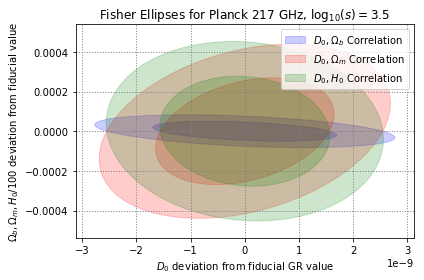

In [15]:

# -------------------- Results and Plots --------------------
# For best results, run one plot at a time. They get finnicky, even with the plt.clf() in between each plot to reset everything


# ---- LogS = 3.5 Plot ----
do_s3_5_plot = True
if do_s3_5_plot == True:
    d0_omB_s3_5_short_params = fisher_ellipse_params(fisher_matrix_d0_omB_s3_5_short)
    d0_omM_s3_5_short_params = fisher_ellipse_params(fisher_matrix_d0_omM_s3_5_short)
    d0_h_0_s3_5_short_params = fisher_ellipse_params(fisher_matrix_d0_h_0_s3_5_short)

    ellipse_omB_1sig = Ellipse((0.,0.), d0_omB_s3_5_short_params[0,0], d0_omB_s3_5_short_params[0,1], d0_omB_s3_5_short_params[0,2], alpha=0.2, color='Blue')
    ellipse_omB_2sig = Ellipse((0.,0.), d0_omB_s3_5_short_params[1,0], d0_omB_s3_5_short_params[1,1], d0_omB_s3_5_short_params[1,2], alpha=0.2, color='Blue', label='$D_0, \Omega_b$ Correlation')

    ellipse_omM_1sig = Ellipse((0.,0.), d0_omM_s3_5_short_params[0,0], d0_omM_s3_5_short_params[0,1], d0_omM_s3_5_short_params[0,2], alpha=0.2, color='Red')
    ellipse_omM_2sig = Ellipse((0.,0.), d0_omM_s3_5_short_params[1,0], d0_omM_s3_5_short_params[1,1], d0_omM_s3_5_short_params[1,2], alpha=0.2, color='Red', label='$D_0, \Omega_m$ Correlation')

    ellipse_h_0_1sig = Ellipse((0.,0.), d0_h_0_s3_5_short_params[0,0], d0_h_0_s3_5_short_params[0,1], d0_h_0_s3_5_short_params[0,2], alpha=0.2, color='Green')
    ellipse_h_0_2sig = Ellipse((0.,0.), d0_h_0_s3_5_short_params[1,0], d0_h_0_s3_5_short_params[1,1], d0_h_0_s3_5_short_params[1,2], alpha=0.2, color='Green', label='$D_0, H_0$ Correlation')


    # Building the plot, telling plot to accept ellipse shapes
    a = plt.subplot(111)
    a.add_artist(ellipse_omB_1sig)
    a.add_artist(ellipse_omB_2sig)
    a.add_artist(ellipse_omM_1sig)
    a.add_artist(ellipse_omM_2sig)
    a.add_artist(ellipse_h_0_1sig)
    a.add_artist(ellipse_h_0_2sig)


    # Proper axes
    plt.xlim(-d0_omM_s3_5_short_params[0,1], d0_omM_s3_5_short_params[0,1])
    plt.ylim(-d0_omM_s3_5_short_params[0,0], d0_omM_s3_5_short_params[0,0])
    plt.legend(handles=[ellipse_omB_2sig,ellipse_omM_2sig,ellipse_h_0_2sig])
    plt.xlabel('$D_0$ deviation from fiducial GR value')
    plt.ylabel('$\Omega_b, \Omega_m, H_0/100$ deviation from fiducial value')
    plt.title('Fisher Ellipses for Planck 217 GHz, $\log_{10}(s)=3.5$')
    plt.grid(color='Gray', linestyle=':', linewidth=1)
    plt.tight_layout()
    #plt.savefig('fisher_ellipse_s3_5.pdf')
    #plt.clf()


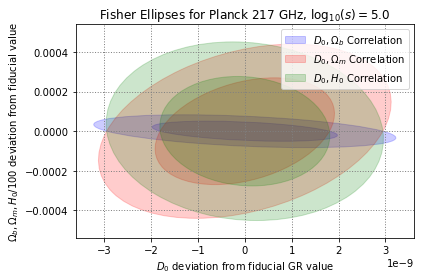

In [16]:

# ---- LogS = 5.0 Plot ----
do_s5_plot = True
if do_s5_plot == True:
    d0_omB_s5_short_params = fisher_ellipse_params(fisher_matrix_d0_omB_s5_short)
    d0_omM_s5_short_params = fisher_ellipse_params(fisher_matrix_d0_omM_s5_short)
    d0_h_0_s5_short_params = fisher_ellipse_params(fisher_matrix_d0_h_0_s5_short)

    ellipse_omB_1sig = Ellipse((0.,0.), d0_omB_s5_short_params[0,0], d0_omB_s5_short_params[0,1], d0_omB_s5_short_params[0,2], alpha=0.2, color='Blue')
    ellipse_omB_2sig = Ellipse((0.,0.), d0_omB_s5_short_params[1,0], d0_omB_s5_short_params[1,1], d0_omB_s5_short_params[1,2], alpha=0.2, color='Blue', label='$D_0, \Omega_b$ Correlation')

    ellipse_omM_1sig = Ellipse((0.,0.), d0_omM_s5_short_params[0,0], d0_omM_s5_short_params[0,1], d0_omM_s5_short_params[0,2], alpha=0.2, color='Red')
    ellipse_omM_2sig = Ellipse((0.,0.), d0_omM_s5_short_params[1,0], d0_omM_s5_short_params[1,1], d0_omM_s5_short_params[1,2], alpha=0.2, color='Red', label='$D_0, \Omega_m$ Correlation')

    ellipse_h_0_1sig = Ellipse((0.,0.), d0_h_0_s5_short_params[0,0], d0_h_0_s5_short_params[0,1], d0_h_0_s5_short_params[0,2], alpha=0.2, color='Green')
    ellipse_h_0_2sig = Ellipse((0.,0.), d0_h_0_s5_short_params[1,0], d0_h_0_s5_short_params[1,1], d0_h_0_s5_short_params[1,2], alpha=0.2, color='Green', label='$D_0, H_0$ Correlation')


    # Building the plot, telling plot to accept ellipse shapes
    a = plt.subplot(111)
    a.add_artist(ellipse_omB_1sig)
    a.add_artist(ellipse_omB_2sig)
    a.add_artist(ellipse_omM_1sig)
    a.add_artist(ellipse_omM_2sig)
    a.add_artist(ellipse_h_0_1sig)
    a.add_artist(ellipse_h_0_2sig)


    # Proper axes
    plt.xlim(-d0_omM_s5_short_params[0,1], d0_omM_s5_short_params[0,1])
    plt.ylim(-d0_omM_s5_short_params[0,0], d0_omM_s5_short_params[0,0])
    plt.legend(handles=[ellipse_omB_2sig,ellipse_omM_2sig,ellipse_h_0_2sig])
    plt.xlabel('$D_0$ deviation from fiducial GR value')
    plt.ylabel('$\Omega_b, \Omega_m, H_0/100$ deviation from fiducial value')
    plt.title('Fisher Ellipses for Planck 217 GHz, $\log_{10}(s)=5.0$')
    plt.grid(color='Gray', linestyle=':', linewidth=1)
    plt.tight_layout()
    #plt.savefig('fisher_ellipse_s5.pdf')
    #plt.clf()



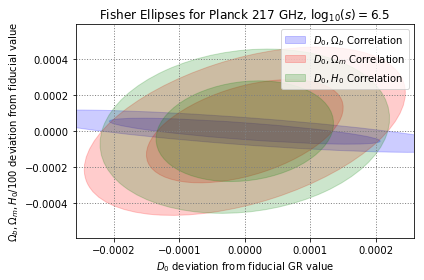

In [17]:

# ---- LogS = 6.5 Plot ----
do_s6_5_plot = True
if do_s6_5_plot == True:
    d0_omB_s6_5_short_params = fisher_ellipse_params(fisher_matrix_d0_omB_s6_5_short)
    d0_omM_s6_5_short_params = fisher_ellipse_params(fisher_matrix_d0_omM_s6_5_short)
    d0_h_0_s6_5_short_params = fisher_ellipse_params(fisher_matrix_d0_h_0_s6_5_short)

    ellipse_omB_1sig = Ellipse((0.,0.), d0_omB_s6_5_short_params[0,0], d0_omB_s6_5_short_params[0,1], d0_omB_s6_5_short_params[0,2], alpha=0.2, color='Blue')
    ellipse_omB_2sig = Ellipse((0.,0.), d0_omB_s6_5_short_params[1,0], d0_omB_s6_5_short_params[1,1], d0_omB_s6_5_short_params[1,2], alpha=0.2, color='Blue', label='$D_0, \Omega_b$ Correlation')

    ellipse_omM_1sig = Ellipse((0.,0.), d0_omM_s6_5_short_params[0,0], d0_omM_s6_5_short_params[0,1], d0_omM_s6_5_short_params[0,2], alpha=0.2, color='Red')
    ellipse_omM_2sig = Ellipse((0.,0.), d0_omM_s6_5_short_params[1,0], d0_omM_s6_5_short_params[1,1], d0_omM_s6_5_short_params[1,2], alpha=0.2, color='Red', label='$D_0, \Omega_m$ Correlation')

    ellipse_h_0_1sig = Ellipse((0.,0.), d0_h_0_s6_5_short_params[0,0], d0_h_0_s6_5_short_params[0,1], d0_h_0_s6_5_short_params[0,2], alpha=0.2, color='Green')
    ellipse_h_0_2sig = Ellipse((0.,0.), d0_h_0_s6_5_short_params[1,0], d0_h_0_s6_5_short_params[1,1], d0_h_0_s6_5_short_params[1,2], alpha=0.2, color='Green', label='$D_0, H_0$ Correlation')


    # Building the plot, telling plot to accept ellipse shapes
    a = plt.subplot(111)
    a.add_artist(ellipse_omB_1sig)
    a.add_artist(ellipse_omB_2sig)
    a.add_artist(ellipse_omM_1sig)
    a.add_artist(ellipse_omM_2sig)
    a.add_artist(ellipse_h_0_1sig)
    a.add_artist(ellipse_h_0_2sig)


    # Proper axes
    plt.xlim(-d0_omM_s6_5_short_params[0,1], d0_omM_s6_5_short_params[0,1])
    plt.ylim(-d0_omM_s6_5_short_params[0,0], d0_omM_s6_5_short_params[0,0])
    plt.legend(handles=[ellipse_omB_2sig,ellipse_omM_2sig,ellipse_h_0_2sig])
    plt.xlabel('$D_0$ deviation from fiducial GR value')
    plt.ylabel('$\Omega_b, \Omega_m, H_0/100$ deviation from fiducial value')
    plt.title('Fisher Ellipses for Planck 217 GHz, $\log_{10}(s)=6.5$')
    plt.grid(color='Gray', linestyle=':', linewidth=1)
    plt.tight_layout()
    #plt.savefig('fisher_ellipse_s6_5.pdf')
    #plt.clf()



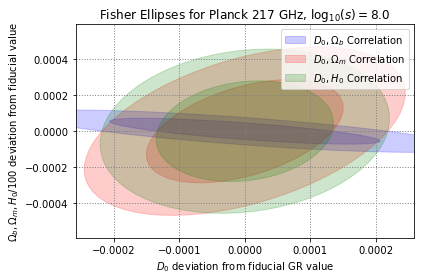

In [18]:

# ---- LogS = 8.0 Plot ----
do_s8_plot = True
if do_s8_plot == True:
    d0_omB_s8_short_params = fisher_ellipse_params(fisher_matrix_d0_omB_s8_short)
    d0_omM_s8_short_params = fisher_ellipse_params(fisher_matrix_d0_omM_s8_short)
    d0_h_0_s8_short_params = fisher_ellipse_params(fisher_matrix_d0_h_0_s8_short)

    ellipse_omB_1sig = Ellipse((0.,0.), d0_omB_s8_short_params[0,0], d0_omB_s8_short_params[0,1], d0_omB_s8_short_params[0,2], alpha=0.2, color='Blue')
    ellipse_omB_2sig = Ellipse((0.,0.), d0_omB_s8_short_params[1,0], d0_omB_s8_short_params[1,1], d0_omB_s8_short_params[1,2], alpha=0.2, color='Blue', label='$D_0, \Omega_b$ Correlation')

    ellipse_omM_1sig = Ellipse((0.,0.), d0_omM_s8_short_params[0,0], d0_omM_s8_short_params[0,1], d0_omM_s8_short_params[0,2], alpha=0.2, color='Red')
    ellipse_omM_2sig = Ellipse((0.,0.), d0_omM_s8_short_params[1,0], d0_omM_s8_short_params[1,1], d0_omM_s8_short_params[1,2], alpha=0.2, color='Red', label='$D_0, \Omega_m$ Correlation')

    ellipse_h_0_1sig = Ellipse((0.,0.), d0_h_0_s8_short_params[0,0], d0_h_0_s8_short_params[0,1], d0_h_0_s8_short_params[0,2], alpha=0.2, color='Green')
    ellipse_h_0_2sig = Ellipse((0.,0.), d0_h_0_s8_short_params[1,0], d0_h_0_s8_short_params[1,1], d0_h_0_s8_short_params[1,2], alpha=0.2, color='Green', label='$D_0, H_0$ Correlation')


    # Building the plot, telling plot to accept ellipse shapes
    a = plt.subplot(111)
    a.add_artist(ellipse_omB_1sig)
    a.add_artist(ellipse_omB_2sig)
    a.add_artist(ellipse_omM_1sig)
    a.add_artist(ellipse_omM_2sig)
    a.add_artist(ellipse_h_0_1sig)
    a.add_artist(ellipse_h_0_2sig)


    # Proper axes
    plt.xlim(-d0_omM_s8_short_params[0,1], d0_omM_s8_short_params[0,1])
    plt.ylim(-d0_omM_s8_short_params[0,0], d0_omM_s8_short_params[0,0])
    plt.legend(handles=[ellipse_omB_2sig,ellipse_omM_2sig,ellipse_h_0_2sig])
    plt.xlabel('$D_0$ deviation from fiducial GR value')
    plt.ylabel('$\Omega_b, \Omega_m, H_0/100$ deviation from fiducial value')
    plt.title('Fisher Ellipses for Planck 217 GHz, $\log_{10}(s)=8.0$')
    plt.grid(color='Gray', linestyle=':', linewidth=1)
    plt.tight_layout()
    #plt.savefig('fisher_ellipse_s8.pdf')
    #plt.clf()


## Wrapping Up
And that's about it! You should now hopefully have a general overview on the project.

So let's take a look at what we've done in these notebooks:
1. Introduced the CMB power spectrum and basic cosmology
2. Shown how different cosmological models give different power spectrum results
3. Discussed how a Boltzmann Code can be used to model different cosmologies
4. Plotted quite a few of these different cosmologies to understand how different parameters shape the power spectrum
5. Introduced modified gravity parameters and a brief background for New Higgs Inflation
6. Plotted different power spectra for varying New Higgs MG parameters
7. Used Fisher Analysis to determine constraints on the New Higgs Inflation parameters
8. Used covariance matrices and ellipse plots to show any degeneracies among $D_0$ and other cosmological parameters

Depending on the exact nature of your project in this field, there are a few steps you could take.  No matter what, you should probably read as many papers as you can (especially on the theory, since we only touch on the basics of that in these notebooks) and get familiar with the Boltzmann Code (you should learn to generate your own outputs). If you're doing work for the observational side of things, more reading on Fisher analysis might be helpful, as well as Renee's CMB summer school notebooks. If you're doing more constraints, learning about the various algorithmic samplers and MCMC would be very helpful. For theory, David Kaiser's notes were by far the most helpful literature out there for me, but there are plenty of papers.

Otherwise, I'm always happy to respond to any emailed questions you might have, or send a copy of my thesis if that's heplful. Best of luck with your ongoing research!